In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df

,Energy;Date;Topic
0,31678;2022-10-04 07:44:00+00:00;shellies/shell...
1,31680;2022-10-04 07:45:02+00:00;shellies/shell...
2,31688;2022-10-04 07:46:04+00:00;shellies/shell...
3,31692;2022-10-04 07:47:21+00:00;shellies/shell...
4,31694;2022-10-04 07:48:15+00:00;shellies/shell...
...,...
54789,129200;2022-07-31 22:29:21+00:00;shellies/shel...
54790,129200;2022-07-31 22:24:20+00:00;shellies/shel...
54791,129200;2022-07-31 22:19:21+00:00;shellies/shel...
54792,129200;2022-07-31 22:14:21+00:00;shellies/shel...


**Divido il dataframe in 3 colonne**

In [4]:
df = pd.DataFrame(df['Energy;Date;Topic'].str.split(';',).tolist(),columns = ['Energy','Date','Topic'])

In [5]:
df['Date'] = pd.to_datetime(df['Date'], utc = True).dt.tz_convert('Europe/Berlin')

In [6]:
df

,Energy,Date,Topic
0,31678,2022-10-04 09:44:00+02:00,shellies/shellyplug-s-D9B9EB/relay/0/energy
1,31680,2022-10-04 09:45:02+02:00,shellies/shellyplug-s-D9B9EB/relay/0/energy
2,31688,2022-10-04 09:46:04+02:00,shellies/shellyplug-s-D9B9EB/relay/0/energy
3,31692,2022-10-04 09:47:21+02:00,shellies/shellyplug-s-D9B9EB/relay/0/energy
4,31694,2022-10-04 09:48:15+02:00,shellies/shellyplug-s-D9B9EB/relay/0/energy
...,...,...,...
54789,129200,2022-08-01 00:29:21+02:00,shellies/shellyplug-s-D9B9EB/relay/0/energy
54790,129200,2022-08-01 00:24:20+02:00,shellies/shellyplug-s-D9B9EB/relay/0/energy
54791,129200,2022-08-01 00:19:21+02:00,shellies/shellyplug-s-D9B9EB/relay/0/energy
54792,129200,2022-08-01 00:14:21+02:00,shellies/shellyplug-s-D9B9EB/relay/0/energy


**Per l'analisi non ho bisogno della colonna 'Topic' perciò la elimino**

In [7]:
df = df[['Energy', 'Date']]

In [8]:
df = df.sort_values(['Date'])

**Creo la colonna 'Consumo' che indicherà quanta energia è stata utilizzata dalla misurazione precedente a quella attuale**

In [9]:
df['Energy'] = df['Energy'].astype('float')

In [10]:
df['Consumo'] = df['Energy'].diff()

In [11]:
df

,Energy,Date,Consumo
54793,129200.0,2022-08-01 00:09:07+02:00,NaN
54792,129200.0,2022-08-01 00:14:21+02:00,0.0
54791,129200.0,2022-08-01 00:19:21+02:00,0.0
54790,129200.0,2022-08-01 00:24:20+02:00,0.0
54789,129200.0,2022-08-01 00:29:21+02:00,0.0
...,...,...,...
50728,70544.0,2022-10-06 18:39:00+02:00,2.0
50729,70546.0,2022-10-06 18:40:01+02:00,2.0
50730,70548.0,2022-10-06 18:41:24+02:00,2.0
50731,70559.0,2022-10-06 18:42:01+02:00,11.0


**Può succedere che il sensore si spenga resettando il valore di energia misurato fino a quel momento,
  questo causa dei valori negativi sballati nel Consumo**

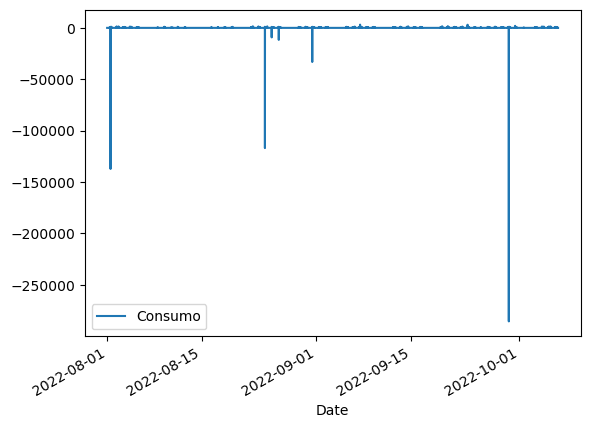

In [12]:
df.plot(x = 'Date', y = "Consumo")
plt.show()

**Elimino i valori sballati prendendo solo quelli positivi**

In [13]:
df = df[df['Consumo']>= 0]

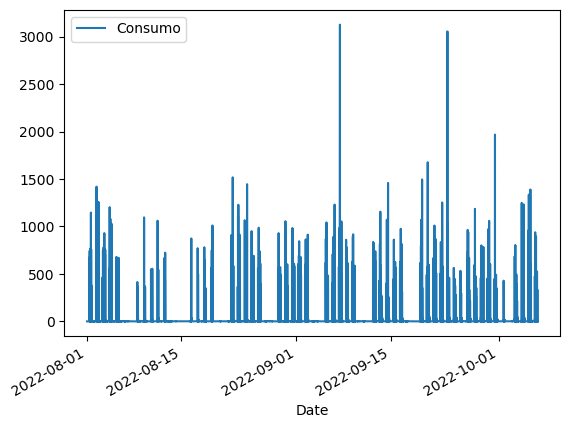

In [14]:
df.plot(x = 'Date', y = "Consumo")
plt.show()

**Ricampiono la 'Date' per intervalli orari, sommando i consumi**

In [15]:
df = df.resample('H', on='Date').agg({'Consumo': 'sum'}).reset_index()

In [16]:
df

,Date,Consumo
0,2022-08-01 00:00:00+02:00,0.0
1,2022-08-01 01:00:00+02:00,0.0
2,2022-08-01 02:00:00+02:00,0.0
3,2022-08-01 03:00:00+02:00,0.0
4,2022-08-01 04:00:00+02:00,0.0
...,...,...
1598,2022-10-06 14:00:00+02:00,1488.0
1599,2022-10-06 15:00:00+02:00,1264.0
1600,2022-10-06 16:00:00+02:00,847.0
1601,2022-10-06 17:00:00+02:00,298.0


**Creo 2 colonne: Ora, e Giorno della settimana**

In [17]:
df['DayOfWeek'] = df['Date'].dt.dayofweek

In [18]:
df['Hour'] = df['Date'].dt.hour

In [19]:
df = df.drop(columns=['Date'])

In [20]:
df

,Consumo,DayOfWeek,Hour
0,0.0,0,0
1,0.0,0,1
2,0.0,0,2
3,0.0,0,3
4,0.0,0,4
...,...,...,...
1598,1488.0,3,14
1599,1264.0,3,15
1600,847.0,3,16
1601,298.0,3,17


**Raggruppo i valori delle ore per giorno della settimana, facendo la media,
  divido il Consumo per 1000 per avere il valore in kW**

In [21]:
df = df.groupby(['DayOfWeek', 'Hour']).mean()

In [22]:
df['Consumo'] = df['Consumo']/1000

In [23]:
df = df.unstack()

In [24]:
df.columns = df.columns.droplevel(0)

In [25]:
df

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
DayOfWeek,,,,,,,,,,,,,,,,,,,,,
0,0.018700,0.018400,0.018100,0.018400,0.018200,0.018700,0.0184,0.105900,1.199900,1.258900,...,1.009500,0.740300,0.884100,0.254400,0.118500,0.076100,0.034900,0.020800,0.020600,0.021200
1,0.020700,0.021300,0.020700,0.021100,0.020800,0.020600,0.0212,0.412500,0.686400,1.496200,...,0.801700,1.071700,0.922700,0.385400,0.120100,0.055600,0.027700,0.020800,0.020800,0.021400
2,0.021200,0.020900,0.020700,0.020800,0.020400,0.021000,0.0212,0.657500,0.486400,1.317200,...,1.073600,0.626100,1.197700,0.640600,0.106700,0.066200,0.032800,0.021300,0.021000,0.021000
3,0.021200,0.021100,0.020900,0.020900,0.020800,0.020800,0.0214,0.431600,0.688900,1.588700,...,1.043600,1.105100,0.426500,0.214500,0.087500,0.069444,0.023667,0.021556,0.021444,0.021222
4,0.021222,0.021000,0.020778,0.020778,0.020778,0.021222,0.0210,0.376556,0.666556,1.561222,...,0.927222,0.828667,0.690444,0.192222,0.092111,0.047222,0.020444,0.021444,0.021111,0.021000
5,0.021222,0.021000,0.021000,0.021111,0.020556,0.020778,0.0210,0.161889,0.052778,0.053444,...,0.052667,0.107667,0.176778,0.073778,0.066556,0.049333,0.021000,0.020444,0.020667,0.020556
6,0.021000,0.021111,0.020556,0.020778,0.020667,0.021111,0.0210,0.125778,0.095444,0.084333,...,0.020556,0.020111,0.020333,0.020222,0.019667,0.019778,0.020222,0.020222,0.020556,0.020778


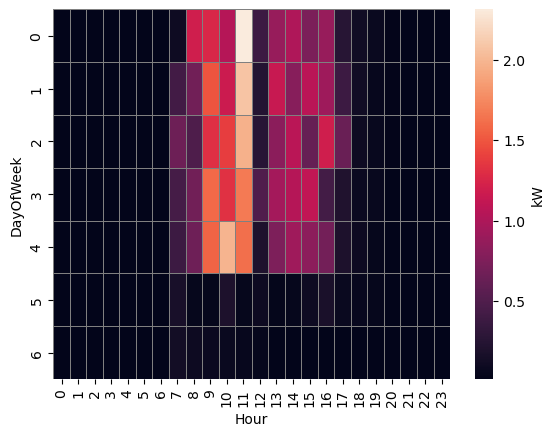

In [26]:
import seaborn as sns
s = sns.heatmap(df, cbar_kws={'label': 'kW'}, linewidths=.5, linecolor = 'gray')